<a href="https://colab.research.google.com/github/mynameis-sohee/Customer-Gender-Prediction/blob/main/01_%5BEDA%5D_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

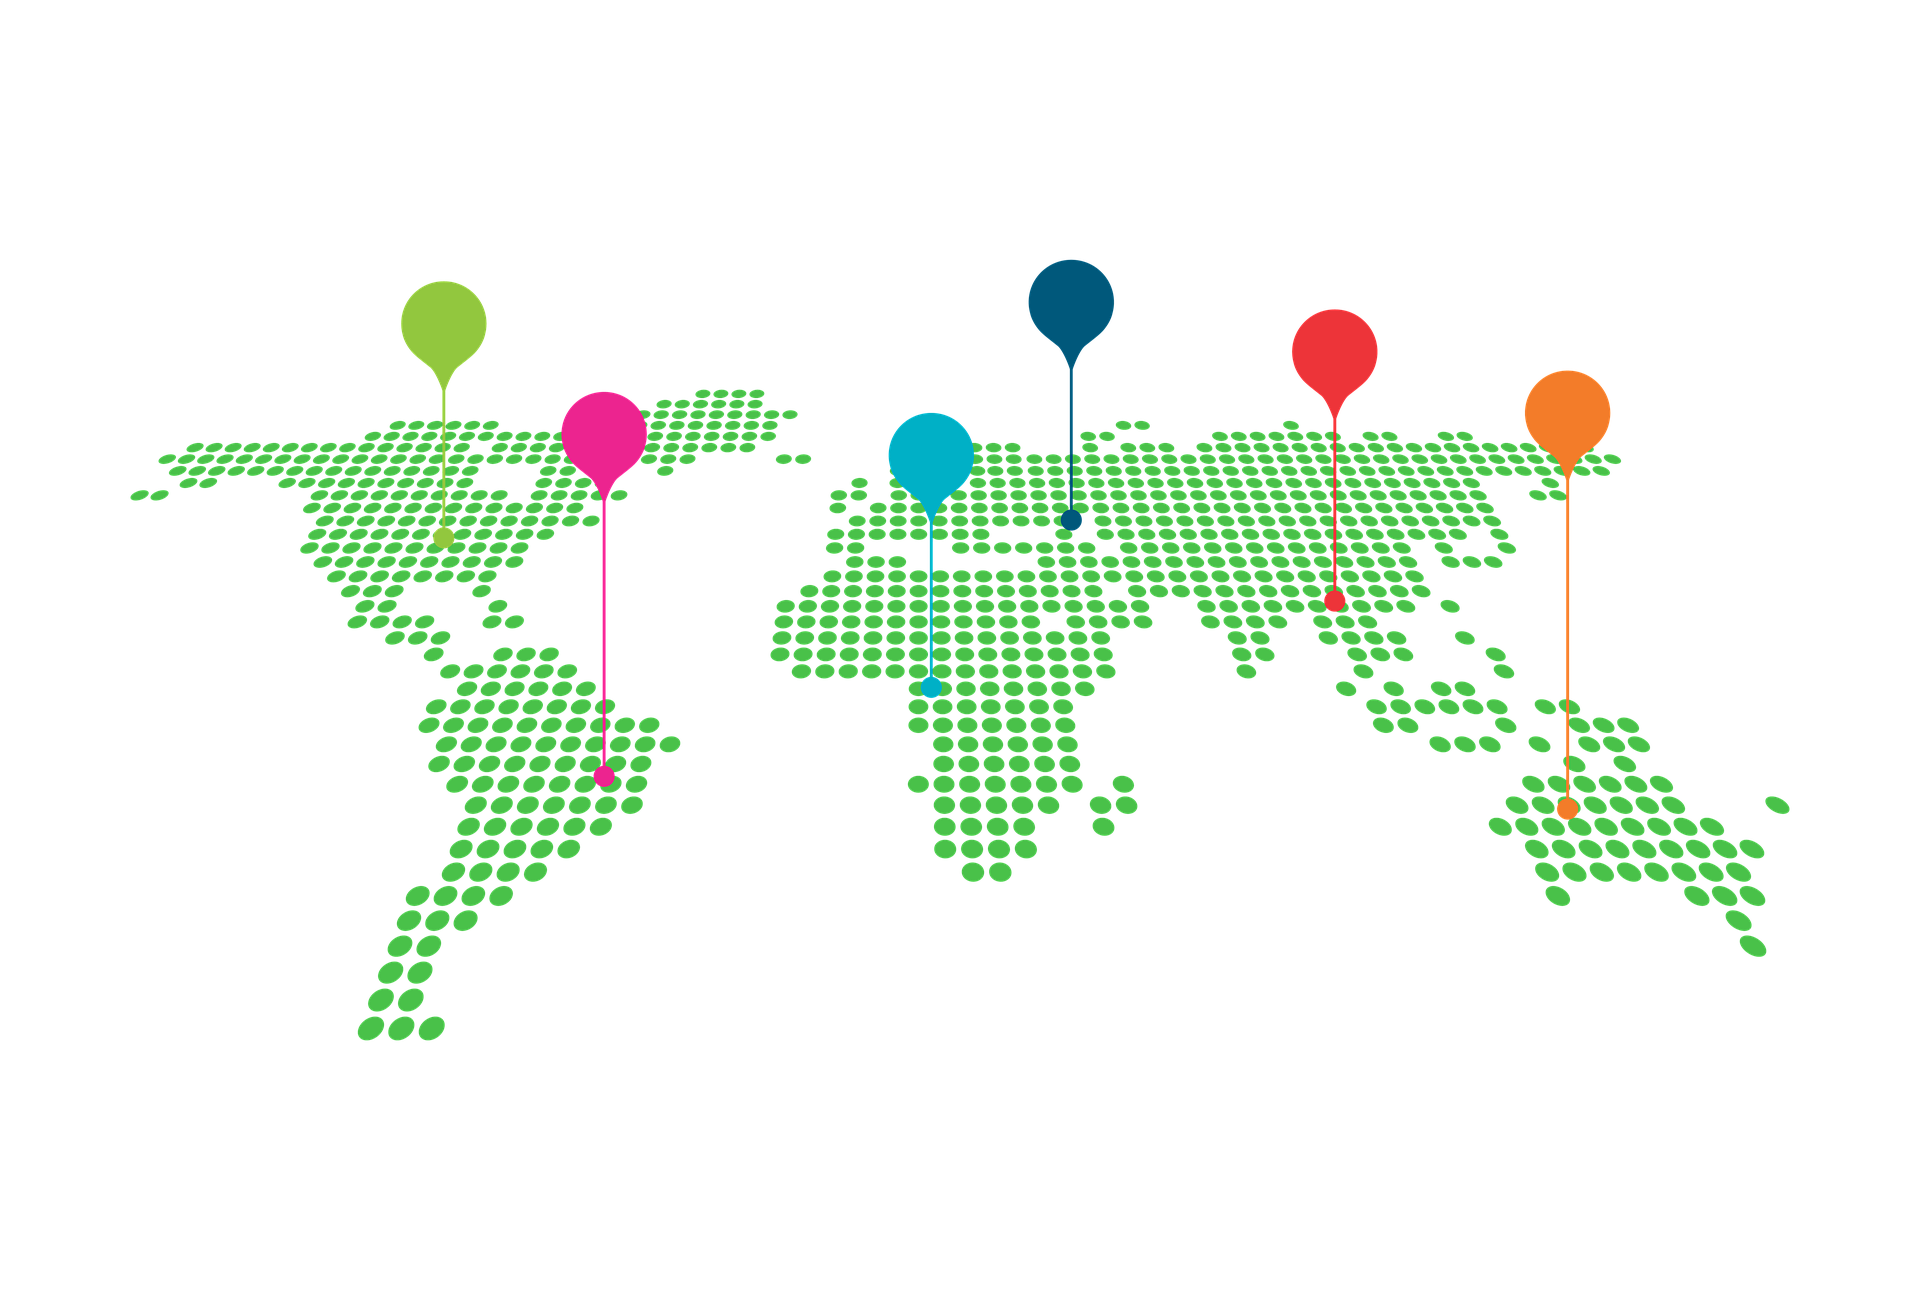
*<a href="https://pixabay.com/ko/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3420274">Pixabay</a>로부터 입수된 <a href="https://pixabay.com/ko/users/kreatikar-8562930/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3420274">Mudassar Iqbal</a>님의 이미지 입니다.*

****


 &nbsp;
#### **미국 AC SuperMarket은 3개의 분점(A,B,C)이 있는 작은 회사입니다.**

#### **본사는 매출 향상 위한 마케팅을 수립하기 위해, 성별에 따른 구매패턴을 분석해보고자 합니다.**

 &nbsp;

* **문제**: 최근 데이터에는 개인정보 이슈로 성별 데이터를 취합하지 않습니다. 따라서, 구매 이력이 기입됐을 때 성별을 자동 예측해야 합니다.


* **목표**: 구매 이력 데이터를 보고, 이들의 **성별을 자동 분류하는 AI 모델**을 만들어야 합니다. 이를 통해 **BI를 제공**합니다.

* **문제해결 방법** : 분류 모델을 활용한 기계학습(ML)

* **주어진 정보**: 고객 구매 데이터 


 &nbsp;
 *****

#### **Features 설명**
* Gender**(Target)** : 성별. Target.
* Unnamed: 0_x : 인덱스
* Invoice ID	: 구매내역 식별 위한 유니크 ID
* Branch	: 지점명 (A,B,C 지점)
* City	: 지역
* Customer type	: 고객 유형 (회원, 비회원)
* Product	line : 총 6개의 상품군으로 분류됨
* Unit price	: 제품 1개 당 가격
* Quantity	: 구매한 제품 수량
* Tax 5%	: 세금 5% 금액
* Total	: 구매한 제품 총액
* Date	: 날짜
* Time	: 시간
* Payment :	지불 유형 (카드, 현금, E월렛)
* cogs	: 매출원가
* gross margin percentage	: 매출 이익율
* income :	수입
* Rating : 고객 등급

***


In [84]:
# 필요한 라이브러리를 import 합니다.

import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler, OneHotEncoder
import datetime
from scipy import stats
import scipy
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [85]:
# 데이터를 로드합니다.
uploaded = files.upload()

Saving X_test.csv to X_test (2).csv
Saving y_test.csv to y_test (2).csv
Saving y_train.csv to y_train (2).csv
Saving X_train (1).csv to X_train (1) (1).csv


In [87]:
#Train 데이터셋의 이름을 'df'로 지정합니다.
X_train=pd.read_csv(io.BytesIO(uploaded['X_train (1).csv']))
X_test=pd.read_csv(io.BytesIO(uploaded['X_test.csv']))
y_train=pd.read_csv(io.BytesIO(uploaded['y_train.csv']))
y_test=pd.read_csv(io.BytesIO(uploaded['y_test.csv']))

df = pd.merge(X_train,y_train,right_index=True,left_index=True)

In [88]:
# 전체 데이터값의 상태를 확인합니다.

df.head(2)

,Unnamed: 0_x,Invoice ID,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0_y,Product line
0,0,308-47-4913,A,Yangon,Member,Female,52.26,10,26.130,548.730,3/9/2019,12:45,Credit card,522.60,4.761905,26.130,6.2,0,Sports and travel
1,1,842-29-4695,C,Naypyitaw,Member,Male,17.14,7,5.999,125.979,1/16/2019,12:07,Credit card,119.98,4.761905,5.999,7.9,1,Sports and travel


In [89]:
# null값이 존재하는지, 데이터의 타입은 무엇인지 등 확인합니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0_x             800 non-null    int64  
 1   Invoice ID               800 non-null    object 
 2   Branch                   800 non-null    object 
 3   City                     800 non-null    object 
 4   Customer type            800 non-null    object 
 5   Gender                   800 non-null    object 
 6   Unit price               800 non-null    float64
 7   Quantity                 800 non-null    int64  
 8   Tax 5%                   800 non-null    float64
 9   Total                    800 non-null    float64
 10  Date                     800 non-null    object 
 11  Time                     800 non-null    object 
 12  Payment                  800 non-null    object 
 13  cogs                     800 non-null    float64
 14  gross margin percentage  8

####Unnamed: 0_x

**Unnamed: 0_x를 살펴봅니다.**

결과: 인덱스값이므로, 삭제해야 하는 Feature입니다.

In [153]:
df['Unnamed: 0_x']

0        0
1        1
2        2
3        3
4        4
      ... 
795    795
796    796
797    797
798    798
799    799
Name: Unnamed: 0_x, Length: 800, dtype: int64

####Invoice ID

**구매이력이 겹치는 Invoice ID가 있는지 살펴봅니다.**

결과: 겹치는 ID는 없습니다.

In [90]:
print(df['Invoice ID'].value_counts())
print(df['Invoice ID'].nunique())

425-85-2085    1
871-39-9221    1
324-92-3863    1
545-46-3100    1
748-45-2862    1
              ..
497-37-6538    1
266-20-6657    1
210-74-9613    1
704-48-3927    1
479-26-8945    1
Name: Invoice ID, Length: 800, dtype: int64
800


#### Branch, City
**Branch, City의 비율을 살펴봅니다.**

 결과: 크진 않지만, 어느 정도 차이가 보입니다. (A>B>C)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(255.0, 272.0), Text(0.5, 1.0, 'City Ratio')]

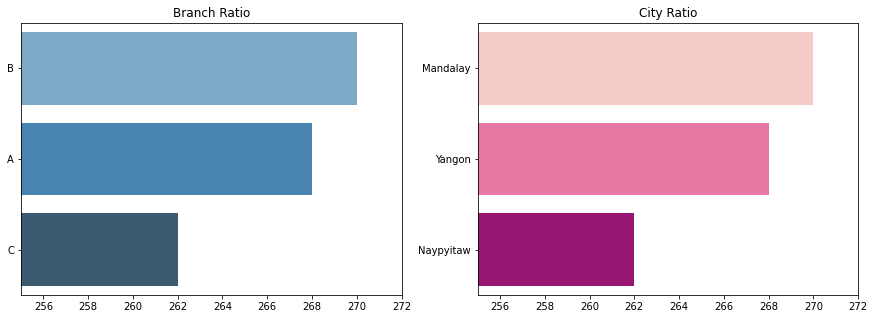

In [91]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,5)

plot_1 = sns.barplot(df['Branch'].value_counts().tolist(), df['Branch'].value_counts().index.tolist(),ax=ax1,palette="Blues_d")
plot_1.set(xlim=(255,272),title='Branch Ratio')

plot_2 = sns.barplot(df['City'].value_counts().tolist(), df['City'].value_counts().index.tolist(),ax=ax2,palette="RdPu")
plot_2.set(xlim=(255,272),title='City Ratio')

**City와 Branch를 Grouping 하여 살펴봅니다.**

 결과 : City와 Branch는 각각 같은 속성을 지님을 알 수 있습니다.

In [92]:
encoder = LabelEncoder()
df['City_Encoder'] = encoder.fit_transform(df['City'])
df['Branch_Encoder'] = encoder.fit_transform(df['Branch'])

df.groupby(['City','Branch']).count()

,,Unnamed: 0_x,Invoice ID,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0_y,Product line,City_Encoder,Branch_Encoder
City,Branch,,,,,,,,,,,,,,,,,,,
Mandalay,B,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
Naypyitaw,C,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
Yangon,A,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268


#### Customer type

**Customer type의 비율을 살펴봅니다.**

결과: 차이가 존재하지만, 대체적으로 균일하게 분포되어 있습니다.

In [93]:
# Customer type의 분포만 단순히 비교해봅니다.
df['Customer type'].value_counts()

Normal    400
Member    400
Name: Customer type, dtype: int64

In [94]:
# Target인 Gender별 Customer type 개수 분포를 확인합니다.
# 남성:비회원,여성:회원인 경우가 많습니다. 평균적으로는 남성의 구매 빈도가 근소하게 높지만 어느정도 균형적으로 분배되었음을 알 수 있습니다.

target = 'Gender'
df.groupby([target,'Customer type']).count()['Invoice ID']

Gender  Customer type
Female  Member           207
        Normal           188
Male    Member           193
        Normal           212
Name: Invoice ID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


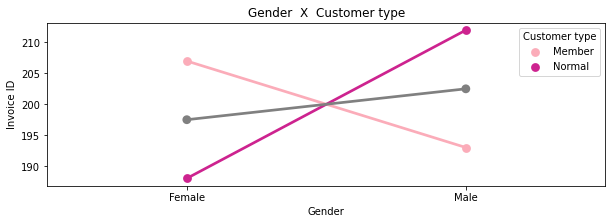

In [95]:
# 해당 정보를 시각화합니다.
Product_Customer=pd.DataFrame(df.groupby([target,'Customer type']).count()['Invoice ID']).reset_index(drop=False)

plt.figure(figsize=(10,3))
plot = sns.pointplot(Product_Customer[target],Product_Customer['Invoice ID'],hue=Product_Customer['Customer type'], palette="RdPu")
plot.set(title=("Gender  X  Customer type"))

sns.pointplot(Product_Customer.groupby(target).mean().index,Product_Customer.groupby(target).mean()['Invoice ID'],color='gray')

In [96]:
# 상관계수 확인

df['Customer type_Encoder'] = encoder.fit_transform(df['Customer type'])
df['Gender_Encoder'] = encoder.fit_transform(df[target])

corr = df.corr()['Gender_Encoder'].sort_values(ascending=False)['Customer type_Encoder'].round(3)

print('상관계수가 ',corr,'이므로, 상관성이 거의 존재하지 않습니다.')

상관계수가  0.048 이므로, 상관성이 거의 존재하지 않습니다.


#### Unit price
**상품군 별 Unit price 편차가 존재하는지 살펴봅니다.** 

결과 : ANOVA 분석 결과, 통계적으로 유의미한 차이가 존재하지 않습니다.

In [97]:
# 그룹핑을 통해, 성별 별 평균 Unit price를 확인해봅니다.

pd.DataFrame(df.groupby(target).mean()['Unit price'])

,Unit price
Gender,
Female,54.385494
Male,56.099407


In [98]:
# 상관계수 확인
# Unit price와 성별의 상관계수가 그리 크지 않음을 확인할 수 있습니다.

corr = df.corr()['Unit price'].sort_values(ascending=False)['Gender_Encoder'].round(3)
print('상관계수가 ',corr,'이므로, 상관성이 거의 존재하지 않습니다.')

상관계수가  0.033 이므로, 상관성이 거의 존재하지 않습니다.


In [99]:
# Unit price가 성별 별로 유의미한 차이가 있는지 통계분석을 진행합니다.
# 1. 성별 별 Unit price값이 기입된 데이터프레임을 형성합니다.

target_category = df[target].unique()

for i in range(0,len(target_category)):
  globals()['df_{}'.format(i)] = df.groupby(target).get_group(target_category[i])[['Unit price']]

In [100]:
# Unit price가 성별 별로 유의미한 차이가 있는지 통계분석을 진행합니다.
# 2. pVal 0.05이상이므로 통계적으로 유의미한 차이가 존재하지는 않습니다.

F_statistic, pVal = stats.f_oneway(df_0,df_1)

if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')

pVal:  [0.356] 이므로 통계적으로 유의미한 차이가 없습니다.





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


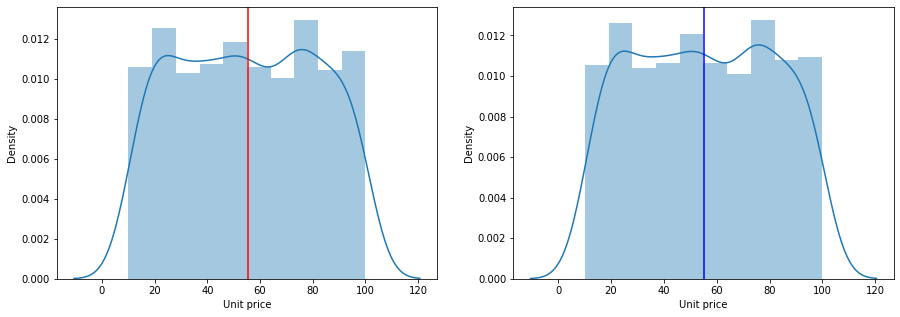

In [148]:
# Unit Price 의 95%이상 & 5%미만 이상치를 제거해봅니다. 결과: 제거를 한 것과 하지 않은 것의 차이가 크지 않으므로, Unit price는 그대로 사용합니다.

figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,5)

plot_a=sns.distplot(df['Unit price'],ax=ax1)
plot_a.axvline(df['Unit price'].mean(), color='red')

plot_b=sns.distplot(df[(df['Unit price']>=np.percentile(df['Unit price'],0.05))&(df['Unit price']<np.percentile(df['Unit price'],99.5))]['Unit price'],ax=ax2)
plot_b.axvline(df[(df['Unit price']>=np.percentile(df['Unit price'],0.05))&(df['Unit price']<np.percentile(df['Unit price'],99.5))]['Unit price'].mean(), color='blue')

#### Quantity
**Quantity 개수, 가장 밀접한 Feature와의 관계를 살펴봅니다.**



결과: 개수는 1부터 10까지 어느정도 편차가 존재합니다. 지불총액과 구매수량은 상관관계가 높습니다.

성별에 따라 구매하는 수량이 통계적으로 유의미한 차이를 보입니다. 여성의 평균 구매수량이 높습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Quantity')

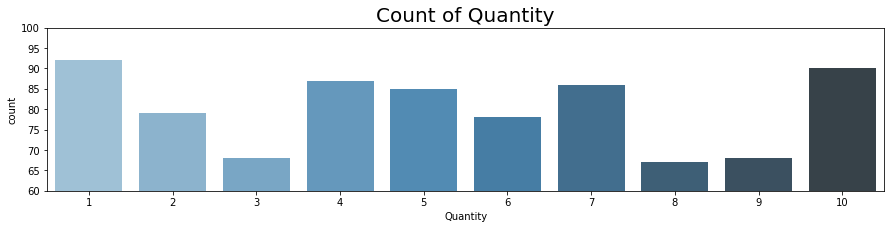

In [101]:
plt.figure(figsize=(15,3))
plot= sns.countplot(df['Quantity'], palette='Blues_d')
plot.set(ylim=(60,100))
plt.title('Count of Quantity',fontsize=20)

pVal:  [0.029] 이므로 통계적으로 유의미한 차이가 있습니다.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


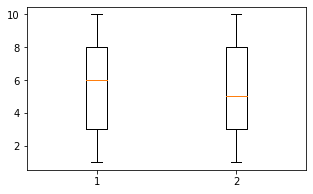

In [102]:
# 성별에 따른 구매수량의 차이는 유의미한 차이가 있습니다.
# 여성일 경우, 평균적으로 구매 수량이 조금 더 많습니다.

for i in range(0,len(target_category)):
  globals()['df_{}'.format(i)] = df.groupby(target).get_group(target_category[i])[['Quantity']]

F_statistic, pVal = stats.f_oneway(df_0,df_1)

if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')


plt.figure(figsize=(5,3))
ax= plt.boxplot([df_0,df_1]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


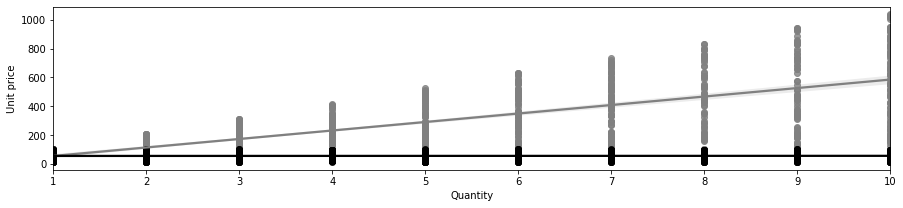

In [104]:
# 선형관계를 살펴보았을 때, 제품 개별 금액에 대해서는 선형관계가 존재하지 않음을 알 수 있었습니다.
# 당연하게도, 개수가 증가하니 전체 지불 금액도 증가하는 것을 알 수 있습니다.

plt.figure(figsize=(15,3))
sns.regplot(df['Quantity'],df['Total'], color='gray')
sns.regplot(df['Quantity'],df['Unit price'],color='black')

#### Tax 5%, Total, cogs, gross income
**금액 관련 Features의 상관관계를 분석하고, 상품군 별 금액 차이가 존재하는지 살펴봅니다.**

결과: 상관계수값 = 1 이므로, 각 Features는 서로를 100% 설명할 수 있습니다.


In [105]:
# 상관관계를 분석합니다.

df.corr()['Total'].sort_values(ascending=False)

gross income               1.000000e+00
Tax 5%                     1.000000e+00
Total                      1.000000e+00
cogs                       1.000000e+00
Quantity                   7.086115e-01
Unit price                 6.289471e-01
Branch_Encoder             4.193653e-02
Unnamed: 0_y               1.008151e-02
Unnamed: 0_x               1.008151e-02
gross margin percentage   -1.814290e-16
City_Encoder              -2.738636e-02
Gender_Encoder            -3.505377e-02
Rating                    -4.899477e-02
Customer type_Encoder     -5.206375e-02
Name: Total, dtype: float64

In [106]:
# 성별에 따른 구매금액 총액의 차이는 유의미한 차이가 없습니다.

for i in range(0,len(target_category)):
  globals()['df_{}'.format(i)] = df.groupby(target).get_group(target_category[i])[['Total']]

F_statistic, pVal = stats.f_oneway(df_0,df_1)

if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')

pVal:  [0.322] 이므로 통계적으로 유의미한 차이가 없습니다.





#### Date
**해당 분석에는 시계열 분석을 진행하지 않습니다.따라서 날짜 데이터를 통해, '요일'이라는 새로운 Feature를 생성할 수 있습니다.**

In [107]:
# 요일 Feature를 생성합니다.

df['Date']= pd.to_datetime(df['Date'])
df['Weekday']=0

for i in range(0,len(df)):
  df['Weekday'][i]=datetime.date(pd.to_numeric(df['Date'].astype('string').str.split('-').str[0][i]), pd.to_numeric(df['Date'].astype('string').str.split('-').str[1][i]), pd.to_numeric(df['Date'].astype('string').str.split('-').str[2][i])).weekday()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Total Value by Day of the Week')

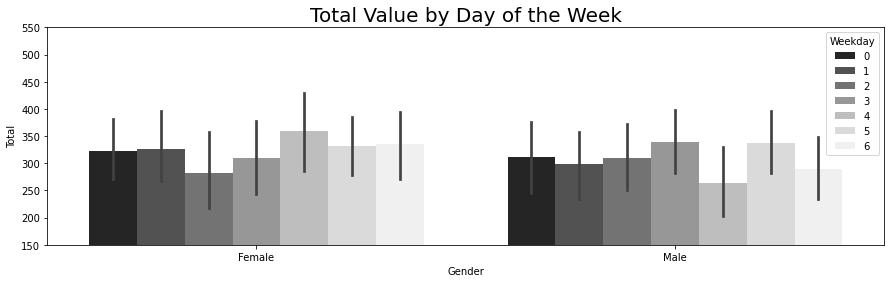

In [108]:
# 요일 간 평균 매출차이 분포를 살펴봅니다. 추후 매출향상을 위한 마케팅 BI 제공하기 위해, 간단히 살펴봅니다.
# 분포도가 요일 별로 조금씩 차이가 있음을 알 수 있습니다.

fig = plt.figure()
fig.set_size_inches(15,4)

plot=sns.barplot(x=df[target],y=df['Total'],hue=df['Weekday'], palette='Greys_r')
plot.set(ylim=(150,550))
plt.title('Total Value by Day of the Week',fontsize=20)

#### Time
**시간대 별 매출분포를 확인해봅니다.**

결과 : 분포는 대체적으로 일정합니다. 추후 범주화가 필요할 것으로 보입니다.

In [109]:
df['Time'].isnull().sum()

0

In [111]:
# 시간 값을 계산하기 용이하도록 바꿉니다. 분 단위를 반올림하여, 시 단위로 변경합니다. 수치형으로 변환합니다. 이는 추후 범주화를 진행하기 위함입니다.

for i in range(0,len(df)):
  if pd.to_numeric(df['Time'].str.split(':').str[1][i])>=30:
    a = pd.to_numeric(df['Time'].str.split(':').str[0][i])+1
  else: a = df['Time'].str.split(':').str[0][i]

  df['Time'][i]= a

df['Time']=df['Time'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Total Sales')]

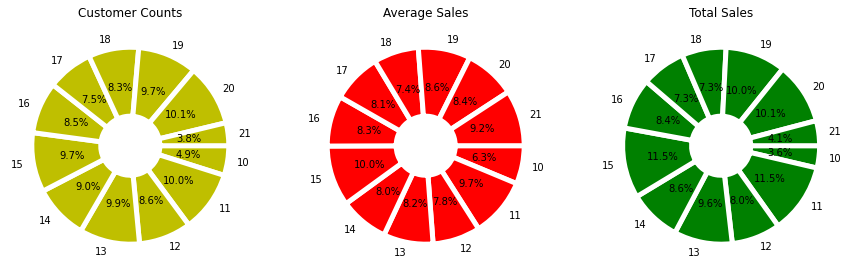

In [127]:
# 시간대 별 방문자 수, 건당 평균매출, 전체 매출을 확인합니다. 시간대별 방문자 수와 전체 매출은 어느정도 비례합니다. 한 건당 평균 매출은 대체적으로 일정하게 분포합니다.

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(15,5)


time_count=df.groupby(['Time']).count()[target].sort_index()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

time_total=df.groupby(['Time']).mean()['Total'].sort_index()
time_sum=df.groupby(['Time']).sum()['Total'].sort_index()

ax1.pie(time_count.tolist(), labels=time_count.index.tolist(), autopct='%.1f%%',wedgeprops=wedgeprops,counterclock=False, colors='y');
ax1.set(title='Customer Counts')
ax2.pie(time_total.tolist(), labels=time_total.index.tolist(), autopct='%.1f%%',wedgeprops=wedgeprops,counterclock=False, colors='r');
ax2.set(title='Average Sales')
ax3.pie(time_sum.tolist(), labels=time_sum.index.tolist(), autopct='%.1f%%',wedgeprops=wedgeprops,counterclock=False, colors='g');
ax3.set(title='Total Sales')

In [141]:
# 특정 feature와 성별에 따라 매출액의 차이가 유의미한지 통계적으로 분석할 수 있도록, 조건 별 dataframe을 각각 생성하는 함수입니다.
def make_df_list(df,feature):
  grouped = df.groupby([feature,target])
  df_list=[]

  for i in range(0,len(grouped.groups)):
    globals()['df{}'.format(i)] = grouped.get_group(list(grouped.groups.keys())[i])['Total']
    df_list.append('df'+str(i))
  return (','.join(df_list).replace("'",""))

# 함수를 실행합니다.
make_df_list(df,'Time')

'df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23'

pVal:  0.128 이므로 통계적으로 유의미한 차이가 없습니다.





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


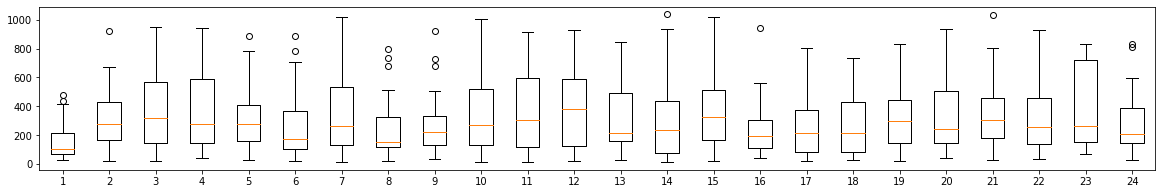

In [143]:
# ANOVA를 통해, 시간과 성별에 따라 매출액의 차이가 유의미한지 통계적으로 분석할 수 있습니다.
F_statistic, pVal = stats.f_oneway(df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23)
if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')

plt.figure(figsize=(20,3))
ax= plt.boxplot([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]);

#### Payment
**지불형태의 유형을 살펴보고, 제품군에 따라 지불방법의 매출 차이가 존재하는지 살펴봅니다.**

결과: 바이올린 Plot 시각화 결과, 제품군에 따라 지불방법이 약간 상이함을 알 수 있습니다.

In [128]:
# 세 개의 Category가 존재합니다.
df['Payment'].unique()

array(['Credit card', 'Cash', 'Ewallet'], dtype=object)

In [129]:
# 편차가 크게 나타나지 않습니다,
df['Payment'].value_counts()

Ewallet        280
Cash           266
Credit card    254
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Total Values by Payment')

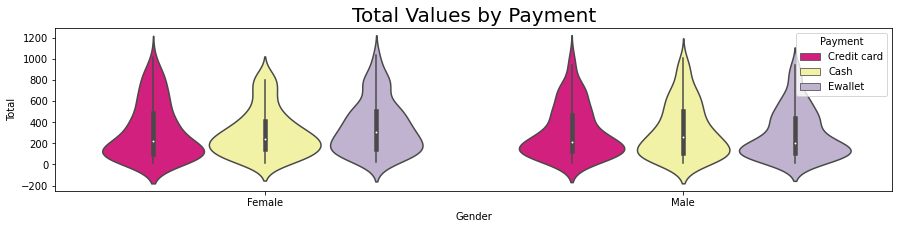

In [132]:
# 성별에 따라, 지불방법 별 매출액 차이가 나는지 확인합니다. 추후 매출향상을 위한 마케팅을 제안하기 위해 간단히 살펴보는 작업입니다.
# 바이올린 plot 분석 결과, 약간은 상이하다는 것을 알 수 있습니다.

df['Payment_Encoder'] = encoder.fit_transform(df['Payment'])

fig = plt.figure()
fig.set_size_inches(15,3)

plot=sns.violinplot(x=df[target],y=df['Total'],hue=df['Payment'], palette='Accent_r')
plt.title('Total Values by Payment',fontsize=20)

In [144]:
# 그렇다면, 이 차이가 통계적으로 유의미한 차이인지 살펴봅니다. 위에서 만든 make_df_list 함수를 활용합니다.
make_df_list(df,'Payment')

'df0,df1,df2,df3,df4,df5'

pVal:  0.272 이므로 통계적으로 유의미한 차이가 없습니다.





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


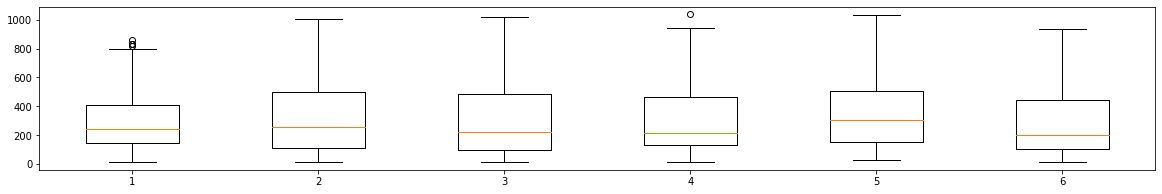

In [145]:
F_statistic, pVal = stats.f_oneway(df0,df1,df2,df3,df4,df5)
if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')

plt.figure(figsize=(20,3))
ax= plt.boxplot([df0,df1,df2,df3,df4,df5]);

#### gross margin percentage
**값의 분포를 확인합니다.**

결과: 한 개의 값(4.761905)만 존재하므로, 분석에 필요 없는 Feature입니다.

또한, 모든 이익 퍼센트가 약 4.76 퍼센트이므로, Total 값과 Gross income 값 등이 완벽한 선형관계를 이루고 있다는 것을 한 차례 더 짚을 수 있습니다.

In [134]:
print(df['gross margin percentage'].isnull().sum())
print(df['gross margin percentage'].value_counts())

0
4.761905    800
Name: gross margin percentage, dtype: int64


#### Rating

**성별에 따른 평균 Rating의 차이가 존재하는지 분포를 확인합니다.**

결과: 성별에 따른 평균 Rating의 평균차이는 어느정도 존재하나, 통계적으로 유의미하지는 않습니다.

pVal:  [0.508] 이므로 통계적으로 유의미한 차이가 없습니다.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating by Gender')

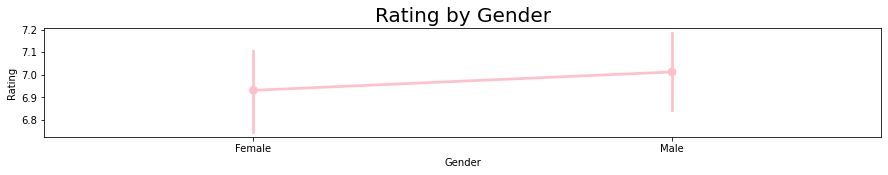

In [136]:
# 성별에 따른 평균 Rating이 통계적으로 유의미하게 차이가 있는지 ANOVA를 통해 확인하고, 분포를 살펴봅니다.

for i in range(0,len(target_category)):
  globals()['df_{}'.format(i)] = df.groupby(target).get_group(target_category[i])[['Rating']]

F_statistic, pVal = stats.f_oneway(df_0,df_1)

if pVal < 0.05: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 있습니다.')
else: print('pVal: ',pVal.round(3),'이므로 통계적으로 유의미한 차이가 없습니다.\n\n\n')


plt.figure(figsize=(15,2))
sns.pointplot(df[target],df['Rating'],color='pink');
plt.title('Rating by Gender',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


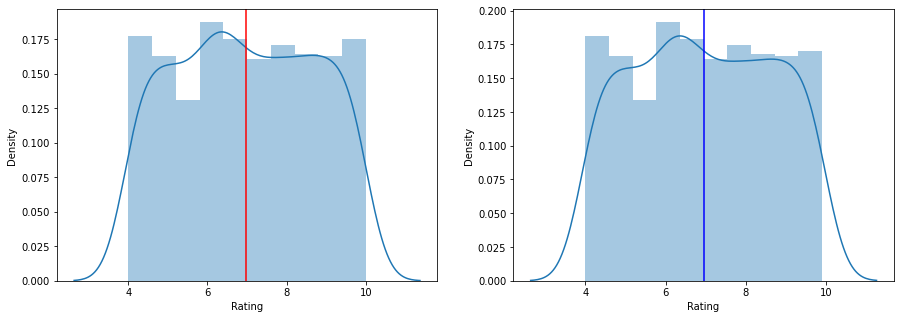

In [149]:
# Rating 의 95%이상 & 5%미만 이상치를 제거해봅니다. 결과: 제거를 한 것과 하지 않은 것의 차이가 크지 않으므로, Rating은 기존값 그대로 사용합니다.

figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,5)

plot_a = sns.distplot(df['Rating'],ax=ax1)
plot_a.axvline(df['Rating'].mean(), color='red')

plot_b=sns.distplot(df[(df['Rating']>=np.percentile(df['Rating'],0.05))&(df['Rating']<np.percentile(df['Rating'],99.5))]['Rating'],ax=ax2)
plot_b.axvline(df[(df['Rating']>=np.percentile(df['Rating'],0.05))&(df['Rating']<np.percentile(df['Rating'],99.5))]['Rating'].mean(), color='blue')

#### Correlation

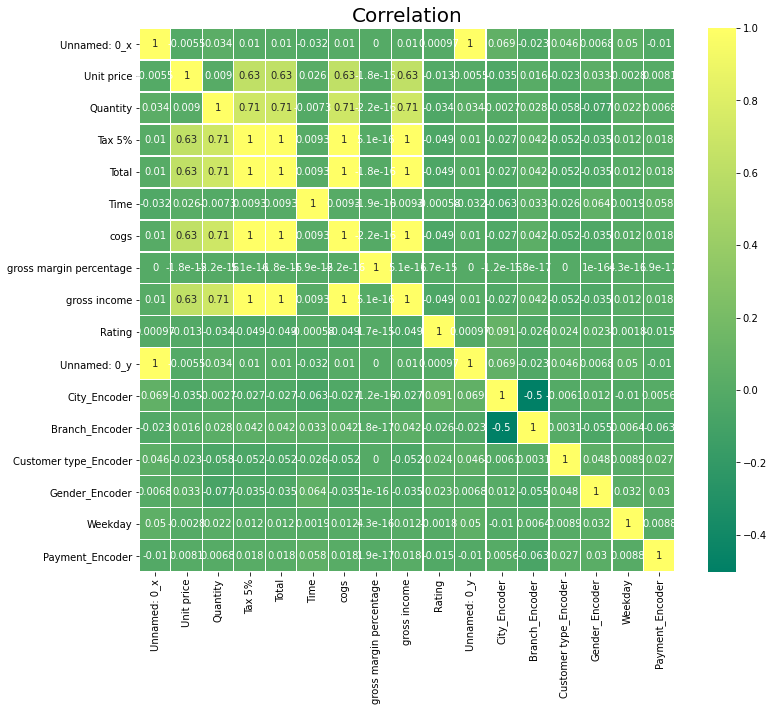

In [150]:
# train 데이터의 상관계수 분포도를 확인해보고, EDA를 마무리합니다.

sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.title('Correlation',fontsize=20)
plt.show()

### 위에서 진행한 EDA를 간단히 정리한 결과는 다음과 같습니다.
 
 &nbsp;

  <head>
    <title>EDA 결과 정리</title>
    <style>
      table, th, td {
        border: 2px solid #bcbcbc;
      }
    </style>
  </head>
  <body>
    <table>
      <thead>
        <tr>
          <th class="jb-th-1">Features</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
<tr>
    <td>Unnamed: 0</td> <td>인덱스 구분값이므로, 삭제</td>
  </tr>
  <tr>
    <td>Invoice ID</td> <td>구매이력을 구분하기 위해 존재하는 것이므로, 삭제</td>
  </tr>
  <tr>
    <td>Branch, City</td> <td>상관계수 1, 서로의 Features를 100% 설명 가능하므로 둘 중 하나의 Columns는 삭제</td> 
  </tr>
    <tr>
    <td>Customer type</td> <td>남성:비회원,여성:회원인 경우가 많고, 평균적으로는 남성의 구매 빈도가 근소하게 높음</td>
  </tr>
    <tr>
    <td>Unit price</td> <td>남성이 조금 더 높으나 통계적으로 유의미한 차이는 아니며, 이상치 제거의 영향이 크지 않으므로 이상치 제거 않고 진행</td>
  </tr>
    <tr>
    <td>Quantity</td> <td>어느정도 편차가 존재. 지불총액과 구매수량은 상관관계가 높음. 여성의 평균 구매수량이 통계적으로 유의미하게 많음.</td>
  </tr>
      <tr>
    <td>Tax 5%, Total, cogs, gross income</td> <td>상관계수 1, 서로의 Features를 100% 설명 가능하므로 한 colum 제외 나머지 삭제</td>
  </tr>
      <tr>
    <td>Date</td> <td>날짜 데이터 통해 'Weekday' Feature 생성 </td>
  </tr>
  <tr>
    <td>Time</td> <td>시간대별 방문자 수와 전체 매출은 어느정도 비례. 한 건당 평균 매출은 대체적으로 일정하게 분포. 시간대에 따른 매출규모 차이: 어느정도 편차 존재하나, 통계적으로 유의미한 차이는 아님.
</td>
  </tr>
  <tr>
    <td>Payment</td> <td>성별에 따른 지불방법 별 매출액 차이는 어느정도 존재하나, 통계적으로 유의미한 차이는 아님</td>
  </tr>
  <tr>
    <td>gross margin percentage
    </td> <td>단일값이므로 삭제</td>
  </tr>
    <tr>
    <td>Rating</td> <td>남성이 조금 더 높으나 통계적으로 유의미한 차이는 아니며, 이상치 제거의 영향이 크지 않으므로 이상치 제거 않고 진행</td>
  </tr>
      </tbody>
    </table>
  </body>
</html>

 &nbsp;

-----


 &nbsp;


&nbsp;

&nbsp;


#### 해당 정보를 바탕으로, 전처리/모델링을 진행할 예정입니다.